In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import itertools
from sklearn.metrics import r2_score
import scipy
register_matplotlib_converters()

In [24]:
# set datetime index
df = pd.read_csv("Sprint_Resampled Data.csv")
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')

In [25]:
df = df['1991-3': '2019-5'].dropna(axis=1)
y = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]

In [28]:
data = {"col":[],"r2":[]}
r2df = pd.DataFrame(data)
for col in df.columns:
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[col], y)
    print(col)
    print(r_value)
    r2df.append(pd.Series([col,r_value]),ignore_index=True)
r2frame

Cushing, OK WTI Spot Price FOB (Dollars per Barrel)
1.0
U.S. Field Production of Crude Oil (Thousand Barrels)
0.02864021860883688
Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)
0.39073196376846825
Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)
0.5865958663816563
Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)
-0.08717591516763734
Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)
0.5059715127010977
Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)
-0.6179121455608487
Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)
0.3885813182796322
Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day)
0.06632897972077556
Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day)
0.48252286650416637
Weekly U.S. Imports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)
0.3

,col,r2


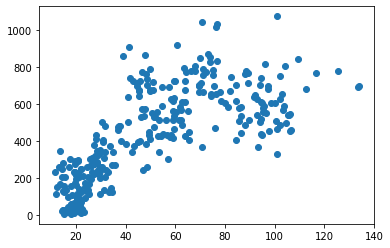

In [29]:
plt.scatter(df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"],df["Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)"])

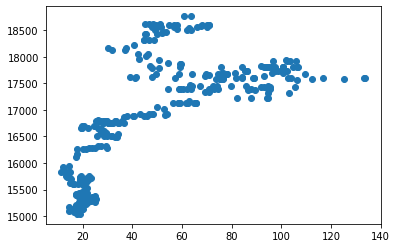

In [32]:
plt.scatter(df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"],df["Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day)"],cmap='jet')